### Motion and body location

In [88]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
motionloc = 'C:/Users/Valued Customer/Desktop/motion_feature.csv'
nomotionloc = 'C:/Users/Valued Customer/Desktop/nomotion_feature.csv'
motion = pd.read_csv(motionloc, header=None,skip_blank_lines=True) # load whole table, row 22 is NA
nomotion = pd.read_csv(nomotionloc, header=None,skip_blank_lines=True)
motion_bl = motion.ix[1:,1]  # column 1 is body location
nomotion_bl = nomotion.ix[1:,1]
mt=pd.DataFrame(motion_bl).append(pd.DataFrame(nomotion_bl),ignore_index=True) # append first, then categorize
mt.columns=['bl']
mt['bl']=mt['bl'].astype('category') # pd series

In [77]:
motion_class = np.empty(len(motion_bl)-1) 
motion_class [:] = 1 #
nomotion_class = np.empty(len(nomotion_bl)-1) 
nomotion_class [:] = 0 
mt['class']=pd.concat([pd.DataFrame(motion_class),pd.DataFrame(nomotion_class)],ignore_index = True)
mt['class']=mt['class'].astype('category') 

### Count image number from each hospital

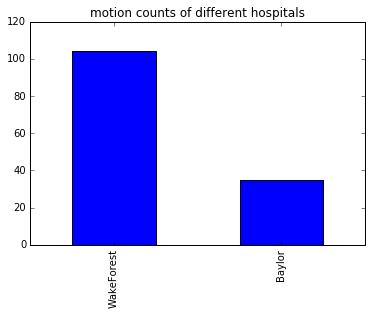

In [146]:
motionhp=[]
for i in range(1,motion.shape[0]):
    motionhp.append(motion.ix[i,0].split("\\")[1])
motionhp=pd.DataFrame(motionhp)[0].astype('category')
_=motionhp.value_counts().plot(kind='bar')
_=plt.title('motion counts of different hospitals')

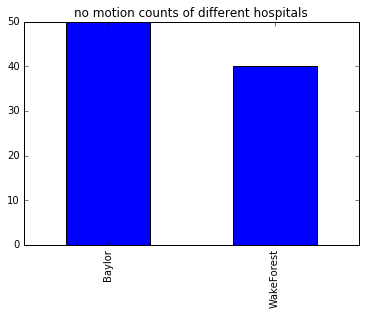

In [147]:
nomotionhp=[]
for i in range(1,nomotion.shape[0]):
    nomotionhp.append(nomotion.ix[i,0].split("\\")[1])
nomotionhp=pd.DataFrame(nomotionhp)[0].astype('category')
_=nomotionhp.value_counts().plot(kind='bar')
_=plt.title('no motion counts of different hospitals')

### Analyze data from each hospital

In [175]:
BmN = sum(motionhp == 'Baylor') # Baylor motion counts
WmN = sum(motionhp == 'WakeForest') # Baylor no motion counts
BnmN = sum(nomotionhp == 'Baylor')
WnmN = sum(nomotionhp == 'WakeForest')

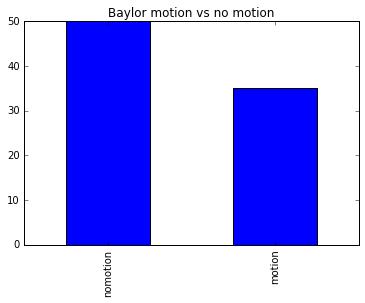

In [177]:
Bm = ["motion" for x in range(BmN)]
Bnm = ["nomotion" for x in range(BnmN)]
B=pd.concat([pd.DataFrame(Bm),pd.DataFrame(Bnm)],ignore_index = True)
B=B[0].astype('category')
_=B.value_counts().plot(kind='bar')
_=plt.title('Baylor motion vs no motion')

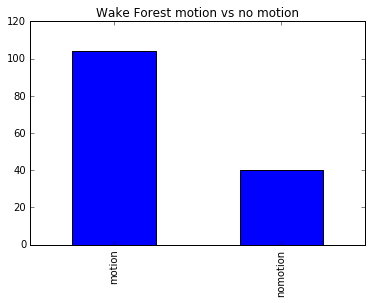

In [179]:
Wm = ["motion" for x in range(WmN)]
Wnm = ["nomotion" for x in range(WnmN)]
W=pd.concat([pd.DataFrame(Wm),pd.DataFrame(Wnm)],ignore_index = True)
W=W[0].astype('category')
_=W.value_counts().plot(kind='bar')
_=plt.title('Wake Forest motion vs no motion')

### Body location counts 

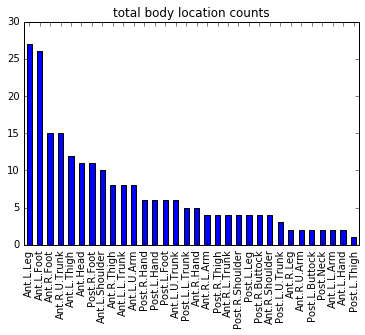

In [185]:
_=mt['bl'].value_counts().plot(kind='bar')
_=plt.title('total body location counts')

### Baylor body location counts

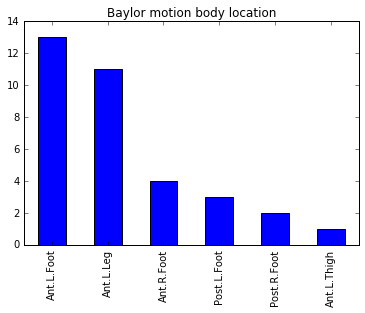

In [262]:
# mt['hp']=pd.DataFrame(motionhp).append(pd.DataFrame(nomotionhp),ignore_index=True) # append first, then categorize
# mt['hp']=mt['hp'].astype('category')
# _=mt['bl'].value_counts().plot(kind='bar')
# _=plt.title('motion counts vs no motion counts')
# loc=motionhp=='Baylor'
motionhpbl=pd.DataFrame()
motionhpbl['bl']=motion_bl
motionhpbl['hp']=motionhp
motionhpbl.shape
Baylorm=motionhpbl.loc[motionhpbl['hp']=='Baylor']
_=Baylorm['bl'].value_counts().plot(kind='bar')
_=plt.title('Baylor motion body location')

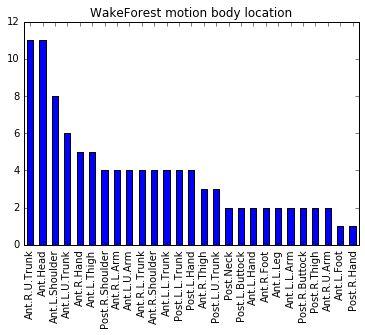

In [263]:
motionhpbl=pd.DataFrame()
motionhpbl['bl']=motion_bl
motionhpbl['hp']=motionhp
motionhpbl.shape
Wakem=motionhpbl.loc[motionhpbl['hp']=='WakeForest']
_=Wakem['bl'].value_counts().plot(kind='bar')
_=plt.title('WakeForest motion body location')

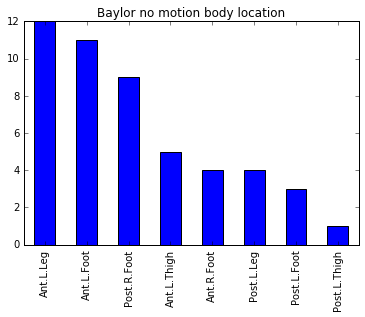

In [265]:
nomotionhpbl=pd.DataFrame()
nomotionhpbl['bl']=nomotion_bl
nomotionhpbl['hp']=nomotionhp
nomotionhpbl.shape
Baylornm=nomotionhpbl.loc[nomotionhpbl['hp']=='Baylor']
_=Baylornm['bl'].value_counts().plot(kind='bar')
_=plt.title('Baylor no motion body location')

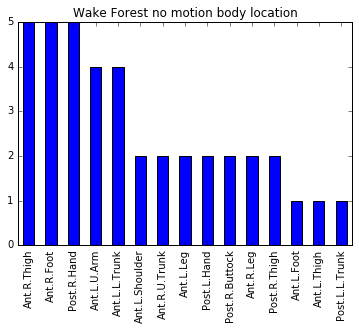

In [267]:
nomotionhpbl=pd.DataFrame()
nomotionhpbl['bl']=nomotion_bl
nomotionhpbl['hp']=nomotionhp
nomotionhpbl.shape
Wakenm=nomotionhpbl.loc[nomotionhpbl['hp']=='WakeForest']
_=Wakenm['bl'].value_counts().plot(kind='bar')
_=plt.title('Wake Forest no motion body location')

### Total number of counts

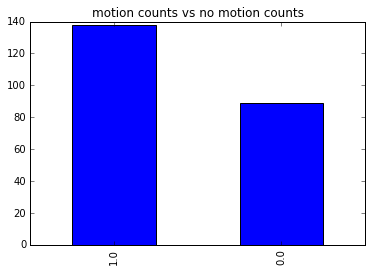

In [107]:
_=mt['class'].value_counts().plot(kind='bar')
_=plt.title('motion counts vs no motion counts')

### Motion and no motion body location counts

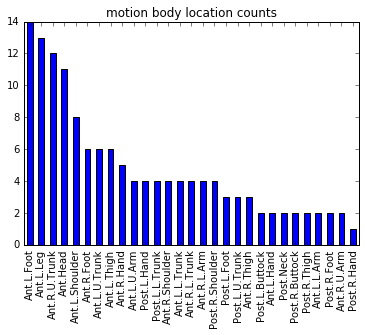

In [106]:
_=motion_bl.value_counts().plot(kind='bar')
_=plt.title('motion body location counts')

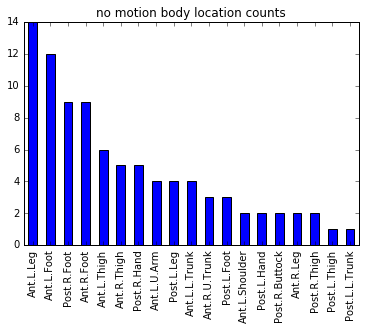

In [105]:
_=nomotion_bl.value_counts().plot(kind='bar')
_=plt.title('no motion body location counts')